## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Data:

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

Goals of the Case Study

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



## Approach
###### Importing Data
###### Inspecting the Dataframe
###### EDA (univariate analysis, outlier detection, checking data imbalance)
###### Dummy Variable Creation
###### Feature Scaling
###### Looking at Correlations
###### Model Building (Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-vales)
###### Build final model
###### Model evaluation with different metrics Sensitivity, Specificity

In [44]:
#IMPORTING REQUIRED LIBRARY
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

## Step 1: Importing Data

In [2]:
lead_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe


In [3]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
# Missing Data Percentage
round(lead_df.isnull().mean()*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

##### Looking at the dataset we observed that following things need to be done:
1.Encoding categorical variables

2.Missing value handling

3.Convert the Select into the NaN

4.Dropping columns having more than 70% null value


## Step 3: Data Preparation
Converting Yes/No to 1/0's:

In [13]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Converting SELECTs into NaNs:

In [14]:
# Listing the categorical variables yet to be encoded
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [15]:
# Checking the labels of the remaining categorical columns

for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead_df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.00

In [16]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

lead_df = lead_df.replace('Select', np.nan)

In [17]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
#Dropping columns having more than 70% null values
lead_df = lead_df.loc[:, lead_df.isnull().mean() < 0.7]

In [22]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [24]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### Comment: There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data

In [25]:
lead_df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [27]:
lead_df = lead_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 
                         'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1)


In [29]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [30]:
# Checking missing data percentage in the updated dataframe

round(100*(lead_df.isnull().mean()), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [31]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


## Step 4: Exploratory Data Analysis


In [32]:
# Lets start with the target variable and see if we have any data imbalance or not 
lead_df["Converted"].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

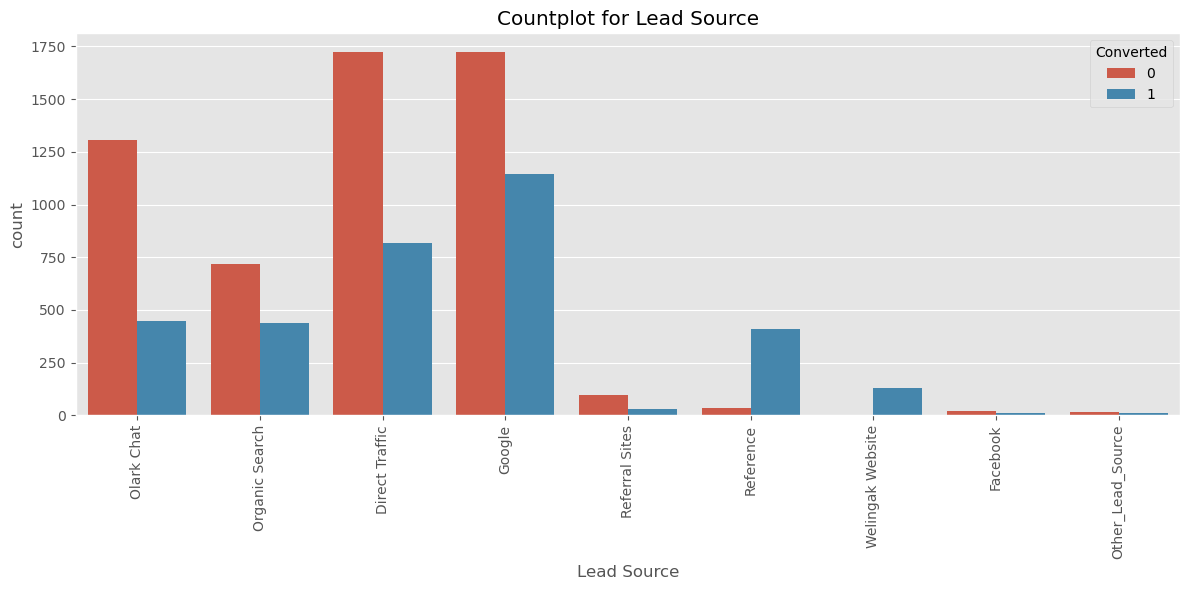

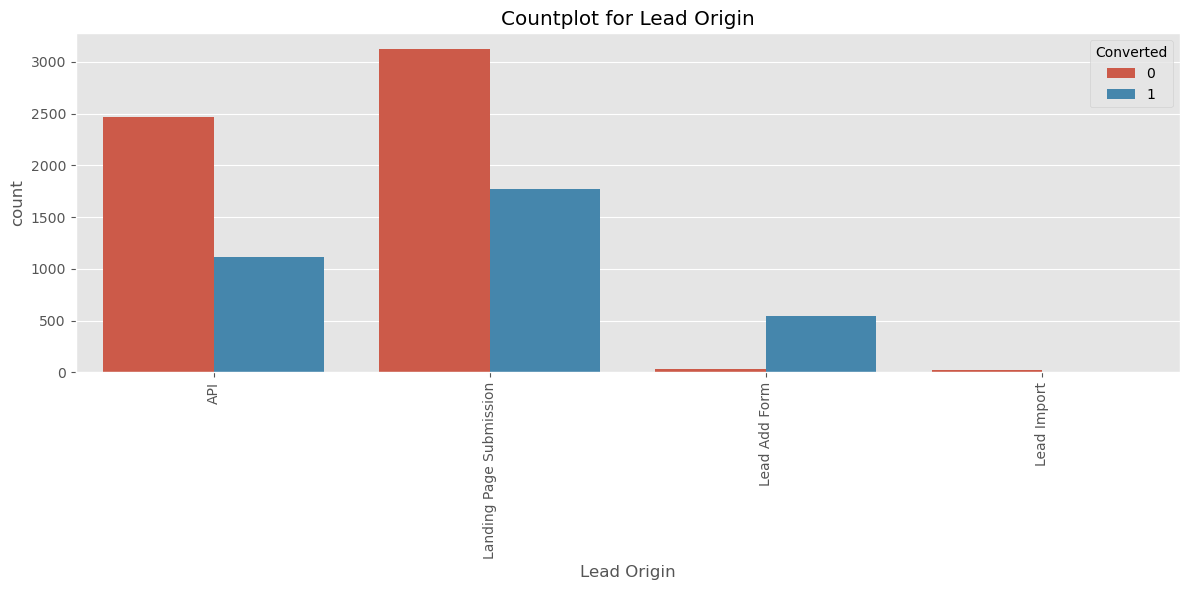

In [62]:
# List of features to plot
features = ['Lead Source', 'Lead Origin']

# Loop through each feature and create a separate plot
for feature in features:
    plt.figure(figsize=(12, 6))  # Create a new figure for each plot
    sns.countplot(x=feature, hue="Converted", data=lead_df)  # Create the countplot
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    plt.title(f'Countplot for {feature}')  # Optional: Add a title for each plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

#### OBSERVATION:

API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable

The count of leads from the Lead Add Form is pretty low but the conversion rate is very high

Lead Import has very less count as well as conversion rate and hence can be ignored



##### To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'



In [35]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

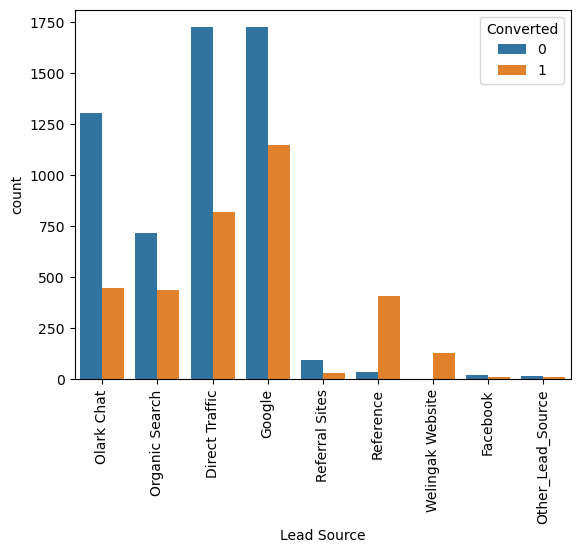

In [36]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

#### OBSERVATION:

The count of leads from the Google and Direct Traffic is maximum
The conversion rate of the leads from Reference and Welingak Website is maximum
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

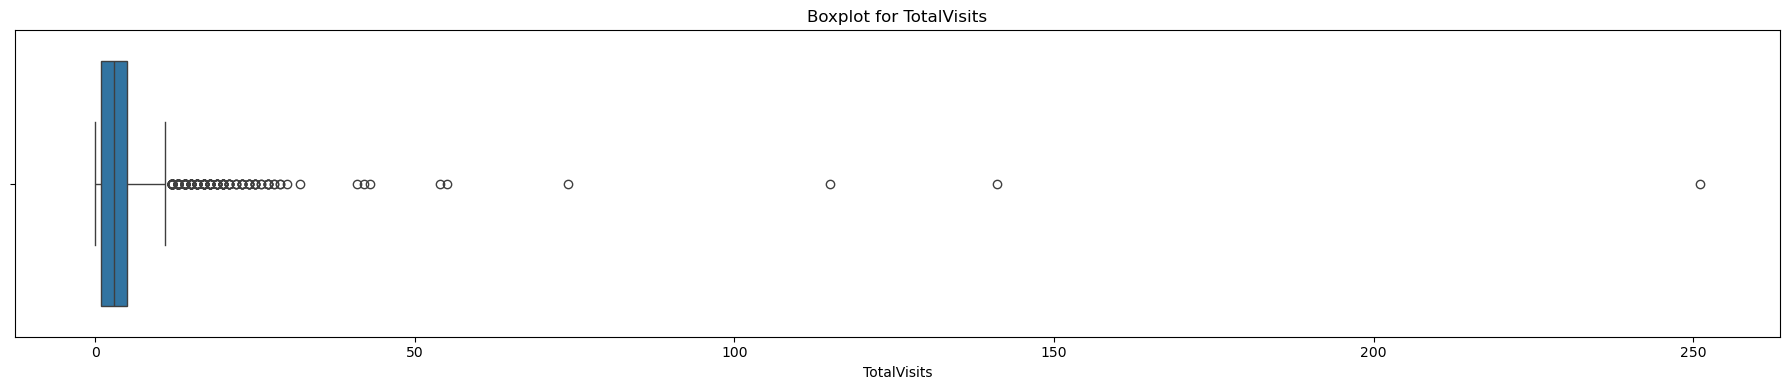

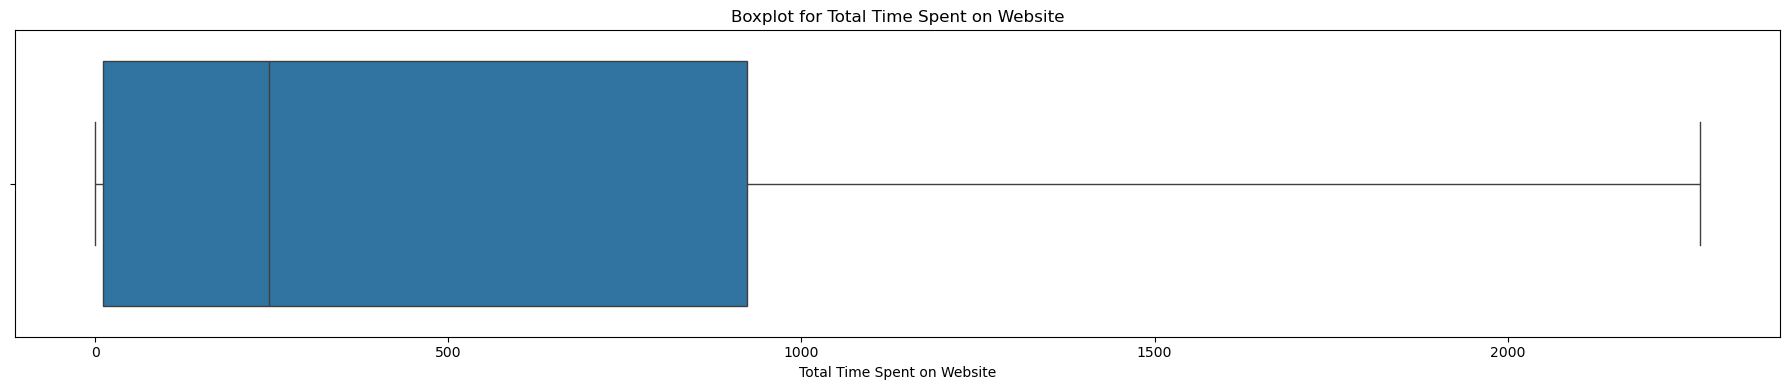

In [41]:
# List of features to plot
features = ["TotalVisits", "Total Time Spent on Website"]

# Loop through each feature and create a separate plot
for feature in features:
    plt.figure(figsize=(18, 4))  # Create a new figure for each plot
    sns.boxplot(data=lead_df, x=feature)  # Plot the boxplot
    plt.title(f'Boxplot for {feature}')  # Optional: Add title for each plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

In [45]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1

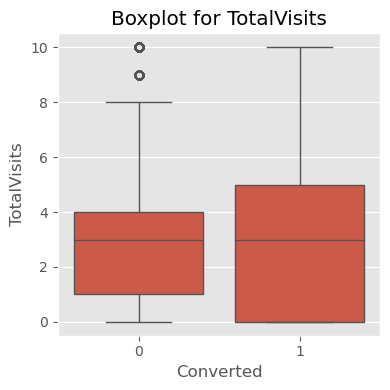

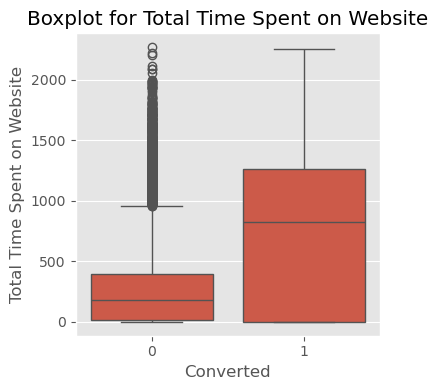

In [52]:
# Loop through each feature and create a separate plot
for feature in features:
    plt.figure(figsize=(4, 4))  # Create a new figure for each plot
    sns.boxplot(y=feature, x='Converted', data=lead_df)  # Create the boxplot
    plt.title(f'Boxplot for {feature}')  # Optional: Add title for each plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

### Users spending more time on the website are more likely to get converted 

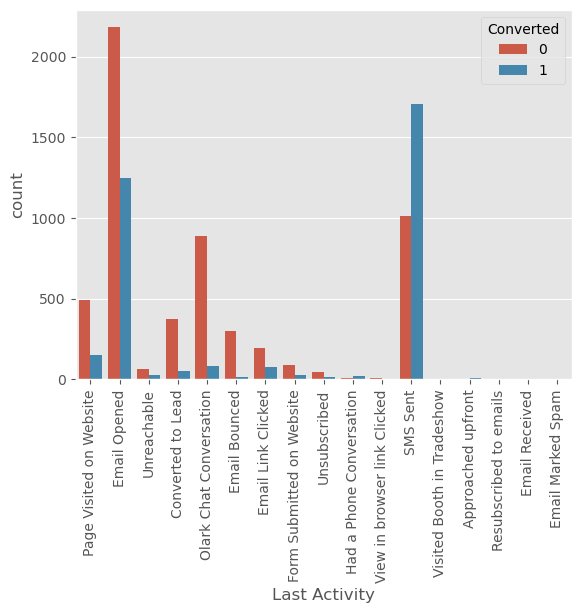

In [54]:
# Plotting the Last Activity  

sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

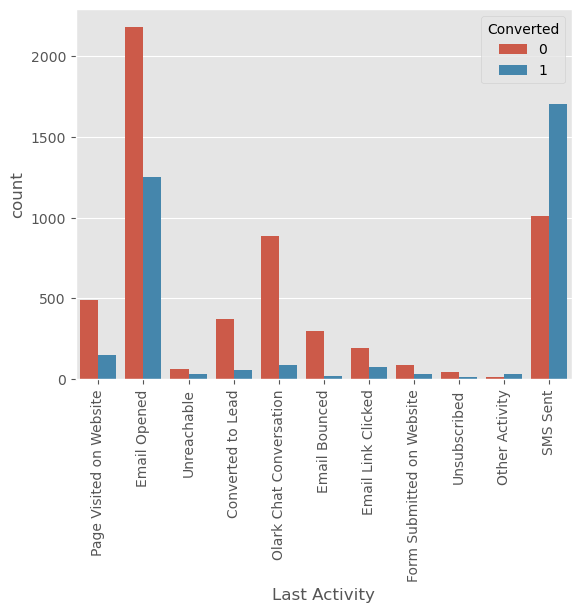

In [55]:
# Converting all the low count categories to the 'Others' category
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()


### OBSERVATION:
The count of lst activity as "Email Opened" is max

The conversion rate of SMS sent as last activity is maximum

#### We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

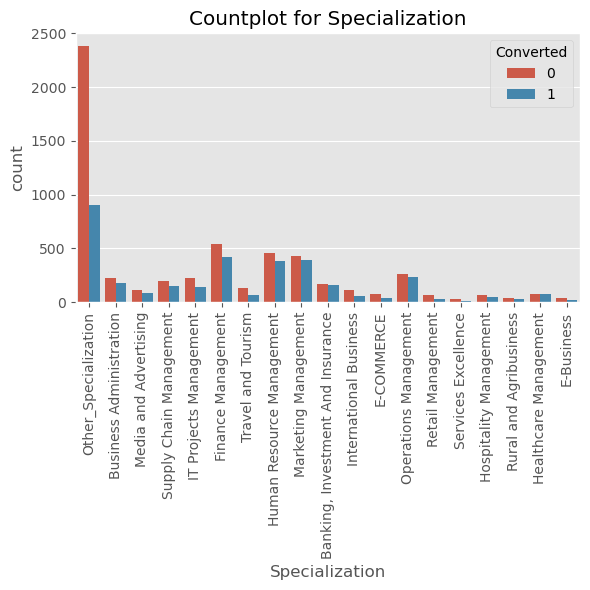

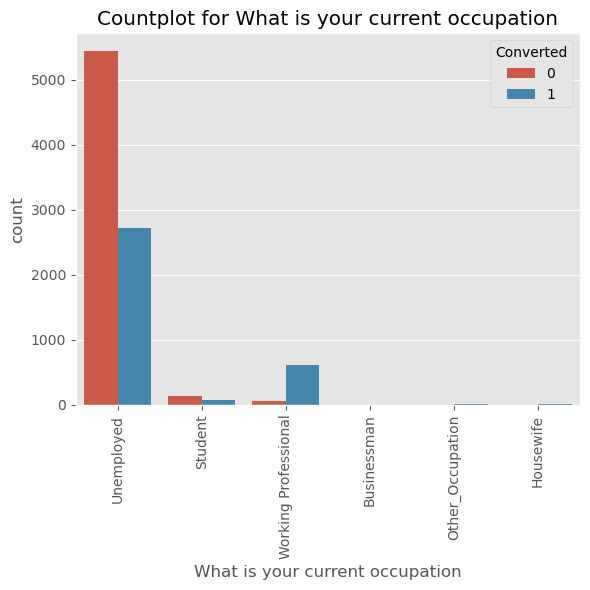

In [58]:
# List of features to plot
features = ["Specialization", "What is your current occupation"]
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace("Other", 'Other_Occupation')
# Loop through each feature and create a separate plot
for feature in features:
    plt.figure(figsize=(6, 6))  # Create a new figure for each plot
    sns.countplot(x=feature, hue="Converted", data=lead_df)  # Create the countplot
    plt.xticks(rotation='vertical')  # Rotate the x-axis labels
    plt.title(f'Countplot for {feature}')  # Optional: Add a title for each plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

#### OBSERVATION:

Looking at above plot, no particular inference can be made for Specialization

Looking at above plot, we can say that working professionals have high conversion rate

Number of Unemployed leads are more than any other category

#### To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

In [59]:
lead_df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


#### OBSERVATION:

We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

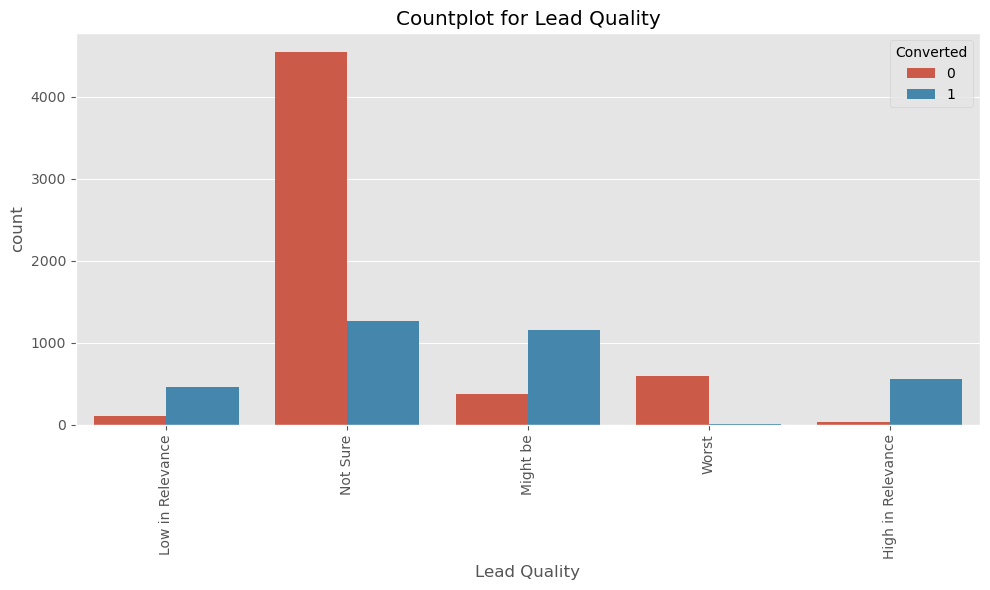

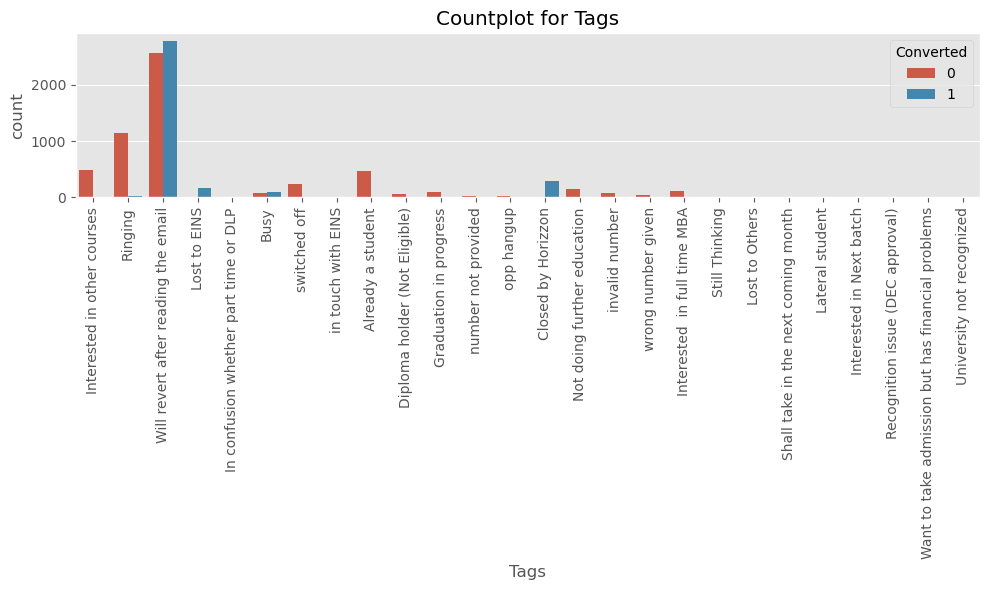

In [60]:
# List of features to plot
features = ["Lead Quality", "Tags"]

# Loop through each feature and create a separate plot
for feature in features:
    plt.figure(figsize=(10, 6))  # Create a new figure for each plot
    sns.countplot(x=feature, hue="Converted", data=lead_df)  # Create the countplot
    plt.xticks(rotation='vertical')  # Rotate the x-axis labels for readability
    plt.title(f'Countplot for {feature}')  # Optional: Add a title for each plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

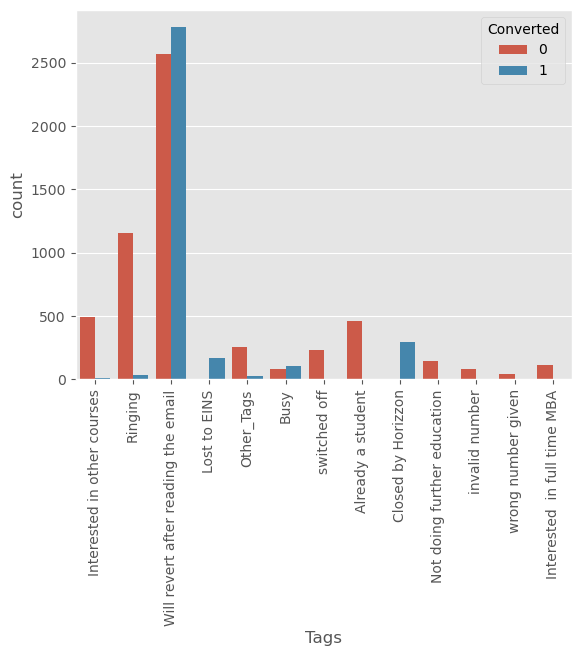

In [61]:
# Converting all low count categories to Others category
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

#### OBSERVATION:

'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

In [63]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [65]:
# Dropping unnecessary columns

lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],axis=1)

lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Step 5: Dummy Variable Creation

In [67]:
# Generate dummy variables with drop_first=True
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Specialization',
                                'What is your current occupation', 'Tags',
                                'Lead Quality', 'City', 'Last Notable Activity']], drop_first=True)

# Convert True/False to 1/0
dummy = dummy.astype(int)

# Show the resulting DataFrame
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [69]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Step 6: Test-Train Split

In [70]:
# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = lead_df['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [72]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


In [77]:
# Select only numeric columns for correlation calculation
numeric_columns = lead_df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
conv_corr = numeric_columns.corr()

# Unstack the correlation matrix to find out the top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")

# Mask the upper triangle and sort the correlation values
top_corr = conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

print(top_corr)


Lead Origin_Lead Import                     Lead Source_Facebook                   0.983684
Lead Origin_Lead Add Form                   Lead Source_Reference                  0.866191
TotalVisits                                 Page Views Per Visit                   0.737996
Lead Source_Olark Chat                      Specialization_Other_Specialization    0.509466
Page Views Per Visit                        Lead Origin_Landing Page Submission    0.484119
Lead Origin_Lead Add Form                   Lead Source_Welingak Website           0.459142
TotalVisits                                 Lead Origin_Landing Page Submission    0.454350
What is your current occupation_Unemployed  Lead Quality_Not Sure                  0.390708
TotalVisits                                 Total Time Spent on Website            0.361207
Converted                                   Last Notable Activity_SMS Sent         0.360233
dtype: float64


In [78]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'],axis= 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)


In [79]:
conv_corr = X_train.corr()

In [81]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)


Lead Origin_Lead Add Form                             Lead Source_Reference                  0.859537
TotalVisits                                           Page Views Per Visit                   0.756104
Lead Source_Olark Chat                                Specialization_Other_Specialization    0.505771
Page Views Per Visit                                  Lead Origin_Landing Page Submission    0.493007
Lead Origin_Lead Add Form                             Lead Source_Welingak Website           0.468225
TotalVisits                                           Lead Origin_Landing Page Submission    0.447765
What is your current occupation_Unemployed            Lead Quality_Not Sure                  0.383141
TotalVisits                                           Total Time Spent on Website            0.349466
What is your current occupation_Working Professional  Lead Quality_Might be                  0.349263
Total Time Spent on Website                           Page Views Per Visit        

### Step 9: Model Building

In [82]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.9
Date:                Thu, 13 Mar 2025   Deviance:                       2895.7
Time:                        15:44:06   Pearson chi2:                 1.92e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5840
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0375      1.752      0.592      0.554      -2.396       4.470
Do Not Email                                            -0.9791      0.252     -3.880      0.000      -1.474      -0.484
TotalVisits                                             -0.0447      0.078     -0.571      0.568      -0.198       0.109
Total Time Spent on Website                              1.1952      0.060     19.867      0.000       1.077       1.313
Page Views Per Visit                                    -0.0580      0.078     -0.745      0.456      -0.211       0.095
Lead Origin_Landing Page Submission                     -0.8405      0.205     -4.093      0.000      -1.243      -0.438
Lead Origin_Lead Add Form                                0.0433      1.252      0.035      0.972      -2.411       2.498
Lead Origin_Lead Import                                  1.1340      0.792      1.433      0.152      -0.417       2.685
Lead Source_Google                                       0.1868      0.142      1.316      0.188      -0.091       0.465
Lead Source_Olark Chat                                   0.8633      0.207      4.167      0.000       0.457       1.269
Lead Source_Organic Search                               0.3060      0.190      1.608      0.108      -0.067       0.679
Lead Source_Other_Lead_Source                            0.7361      0.805      0.914      0.361      -0.842       2.314
Lead Source_Reference                                    2.0594      1.306      1.576      0.115      -0.501       4.620
Lead Source_Referral Sites                              -0.4609      0.470     -0.980      0.327      -1.383       0.461
Lead Source_Welingak Website                             5.5288      1.456      3.796      0.000       2.674       8.383
Specialization_Business Administration                  -0.2252      0.367     -0.614      0.539      -0.944       0.493
Specialization_E-Business                               -0.3024      0.661     -0.457      0.648      -1.598       0.994
Specialization_E-COMMERCE                                0.5538      0.523      1.058      0.290      -0.472       1.579
Specialization_Finance Management                       -0.3372      0.320     -1.055      0.292      -0.964       0.290
Specialization_Healthcare Management                    -0.4380      0.502     -0.873      0.383      -1.421       0.545
Specialization_Hospitality Management                   -0.1794      0.513     -0.349      0.727      -1.186       0.827
Specialization_Human Resource Management                -0.3188      0.327     -0.974      0.330      -0.960       0.322
Specialization_IT Projects Management                    0

### Step 10: Feature Selection Using RFE

In [85]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Correct initialization

rfe = rfe.fit(X_train, y_train)

# Output: Feature names, their support (whether they are selected), and their rankin
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Other_Lead_Source', False, 42),
 ('Lead Source_Reference', False, 32),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 53),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 28),
 ('Specialization_Hospitality Management', False, 47),
 ('Specialization_Human Resource Management', False, 33),
 ('Specialization_IT Projects Management', False, 39),
 ('Specialization_Int

In [87]:
col = X_train.columns[rfe.support_]
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1529.0
Date:                Thu, 13 Mar 2025   Deviance:                       3057.9
Time:                        16:05:45   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5733
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0652      0.220     -4.841      0.000      -1.496      -0.634
Do Not Email                                            -1.1314      0.220     -5.137      0.000      -1.563      -0.700
Total Time Spent on Website                              0.9454      0.048     19.510      0.000       0.850       1.040
Lead Origin_Lead Add Form                                2.1700      0.356      6.099      0.000       1.473       2.867
Lead Source_Welingak Website                             3.1489      0.816      3.861      0.000       1.550       4.747
What is your current occupation_Working Professional     1.2776      0.303      4.210      0.000       0.683       1.872
Tags_Busy                                                3.9100      0.310     12.613      0.000       3.302       4.518
Tags_Closed by Horizzon                                  7.9697      0.788     10.112      0.000       6.425       9.514
Tags_Lost to EINS                                        8.9548      0.768     11.654      0.000       7.449      10.461
Tags_Ringing                                            -0.8699      0.322     -2.701      0.007      -1.501      -0.239
Tags_Will revert after reading the email                 3.7892      0.229     16.578      0.000       3.341       4.237
Tags_switched off                                       -1.2460      0.587     -2.121      0.034      -2.397      -0.095
Lead Quality_Not Sure                                   -3.0390      0.132    -23.065      0.000      -3.297      -2.781
Lead Quality_Worst                                      -4.1538      0.818     -5.080      0.000      -5.757      -2.551
Last Notable Activity_Modified                          -1.6751      0.110    -15.271      0.000      -1.890      -1.460
Last Notable Activity_Olark Chat Conversation           -1.8733      0.391     -4.791      0.000      -2.640      -1.107
========================================================================================================================
"""

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.385442
1012    0.336399
9226    0.000559
4750    0.775329
7987    0.993837
1281    0.973162
2880    0.240813
4971    0.832820
7536    0.995107
1248    0.007446
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.85442322e-01, 3.36398978e-01, 5.58672789e-04, 7.75328974e-01,
       9.93837077e-01, 9.73161621e-01, 2.40812738e-01, 8.32819719e-01,
       9.95106587e-01, 7.44591449e-03])

In [123]:
#Creating a dataframe with the true convertion status and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.385442,3009
1,0,0.336399,1012
2,0,0.000559,9226
3,1,0.775329,4750
4,1,0.993837,7987


In [124]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.385442,3009,0
1,0,0.336399,1012,0
2,0,0.000559,9226,0
3,1,0.775329,4750,1
4,1,0.993837,7987,1


In [125]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.911037631868997


In [126]:
# checking vif
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                             Features  \
11                              Lead Quality_Not Sure   
9            Tags_Will revert after reading the email   
2                           Lead Origin_Lead Add Form   
13                     Last Notable Activity_Modified   
8                                        Tags_Ringing   
3                        Lead Source_Welingak Website   
4   What is your current occupation_Working Profes...   
6                             Tags_Closed by Horizzon   
1                         Total Time Spent on Website   
0                                        Do Not Email   
12                                 Lead Quality_Worst   
7                                   Tags_Lost to EINS   
5                                           Tags_Busy   
10                                  Tags_switched off   
14      Last Notable Activity_Olark Chat Conversation   

    Variance Inflation Factor  
11                       3.24  
9                      

In [ ]:
#All variables have a good value of VIF. But we observed earlier that the column "Tags_invalid number" has high p-value and hence we will drop this column and remake the model.

col = col.drop('Tags_invalid number')
col

In [131]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1529.0
Date:                Fri, 14 Mar 2025   Deviance:                       3057.9
Time:                        14:02:37   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5733
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0652      0.220     -4.841      0.000      -1.496      -0.634
Do Not Email                                            -1.1314      0.220     -5.137      0.000      -1.563      -0.700
Total Time Spent on Website                              0.9454      0.048     19.510      0.000       0.850       1.040
Lead Origin_Lead Add Form                                2.1700      0.356      6.099      0.000       1.473       2.867
Lead Source_Welingak Website                             3.1489      0.816      3.861      0.000       1.550       4.747
What is your current occupation_Working Professional     1.2776      0.303      4.210      0.000       0.683       1.872
Tags_Busy                                                3.9100      0.310     12.613      0.000       3.302       4.518
Tags_Closed by Horizzon                                  7.9697      0.788     10.112      0.000       6.425       9.514
Tags_Lost to EINS                                        8.9548      0.768     11.654      0.000       7.449      10.461
Tags_Ringing                                            -0.8699      0.322     -2.701      0.007      -1.501      -0.239
Tags_Will revert after reading the email                 3.7892      0.229     16.578      0.000       3.341       4.237
Tags_switched off                                       -1.2460      0.587     -2.121      0.034      -2.397      -0.095
Lead Quality_Not Sure                                   -3.0390      0.132    -23.065      0.000      -3.297      -2.781
Lead Quality_Worst                                      -4.1538      0.818     -5.080      0.000      -5.757      -2.551
Last Notable Activity_Modified                          -1.6751      0.110    -15.271      0.000      -1.890      -1.460
Last Notable Activity_Olark Chat Conversation           -1.8733      0.391     -4.791      0.000      -2.640      -1.107
========================================================================================================================
"""

In [132]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.385442,3009,0
1,0,0.336399,1012,0
2,0,0.000559,9226,0
3,1,0.775329,4750,1
4,1,0.993837,7987,1


In [134]:
#Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.911037631868997


In [136]:
#Let's now check the VIFs again
calculate_vif(X_train[col])



                                             Features  \
11                              Lead Quality_Not Sure   
9            Tags_Will revert after reading the email   
2                           Lead Origin_Lead Add Form   
13                     Last Notable Activity_Modified   
8                                        Tags_Ringing   
3                        Lead Source_Welingak Website   
4   What is your current occupation_Working Profes...   
6                             Tags_Closed by Horizzon   
1                         Total Time Spent on Website   
0                                        Do Not Email   
12                                 Lead Quality_Worst   
7                                   Tags_Lost to EINS   
5                                           Tags_Busy   
10                                  Tags_switched off   
14      Last Notable Activity_Olark Chat Conversation   

    Variance Inflation Factor  
11                       3.24  
9                      

#### Comment: All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [138]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        

In [139]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3720  185]
 [ 380 2066]]
Accuracy : 0.911037631868997
Sensitivity : 0.8446443172526574
Specificity : 0.9526248399487837
Precision : 0.9178143047534429


#### Step 11: Plotting the ROC Curve
An ROC curve

shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.
Here, our goal is to have achieve good sensitivity score

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

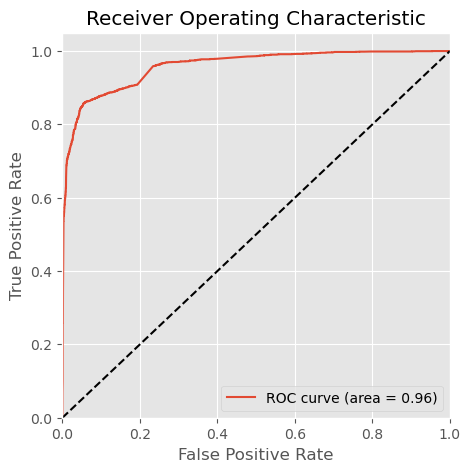

In [142]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 12: Finding optimal value of the cut off

In [143]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.385442,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.336399,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.000559,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.775329,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.993837,7987,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

In [ ]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

In [150]:
#Precision-Recall Trade off

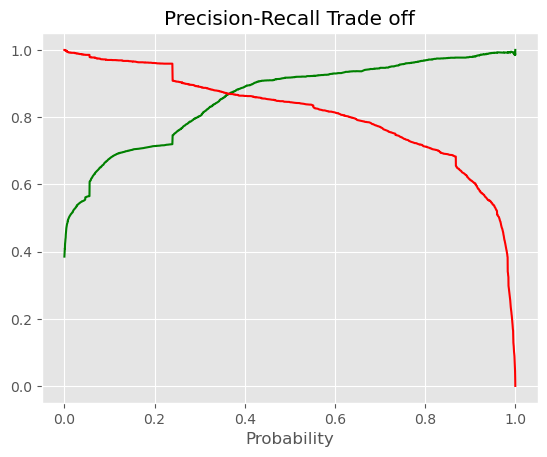

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In [152]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.385442,3009,1,39
1,0,0.336399,1012,1,34
2,0,0.000559,9226,0,0
3,1,0.775329,4750,1,78
4,1,0.993837,7987,1,99


In [153]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3280  625]
 [ 247 2199]]
Accuracy : 0.8626987875925051
Sensitivity : 0.8990188062142274
Specificity : 0.8399487836107554
Precision : 0.7786827195467422


In [154]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,1.000000,1,100
1,1,1490,1.000000,1,100
2,0,7936,1.000000,1,100
3,1,4216,0.999389,1,100
4,0,3830,1.000000,1,100


In [155]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[ 313 1421]
 [  13  976]]
Accuracy : 0.47337495409474845
Sensitivity : 0.9868554095045501
Specificity : 0.18050749711649366
Precision : 0.4071756362119316


### Step 12 : Final Model

In [156]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [157]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.385442                  1          39
1         1012          0             0.336399                  1          34
2         9226          0             0.000559                  0           0
3         4750          1             0.775329                  1          78
4         7987          1             0.993837                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.999389                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.999389,1,100
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100


In [158]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)


Features used in Final Model : Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.065206
Do Not Email                                           -1.131408
Total Time Spent on Website                             0.945443
Lead Origin_Lead Add Form                               2.170025
Lead Source_Welingak Website                            3.148856
What is your current occupation_Working Professional    1.277609
Ta

### Conclusion:
The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)

Our final Logistic Regression Model is built with 14 features.

Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors.

‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’. ‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.

Tags_Lost to EINS (Coefficient factor = 9.578632)

Tags_Closed by Horizzon (Coefficient factor = 8.555901)

Lead Quality_Worst (Coefficient factor =-3.943680)

The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.

The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.

We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)